https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
https://docs.google.com/spreadsheets/d/e/2PACX-1vQU0SIALScXx8VXDX7yKNKWWPKE1YjFlWc6VTEVSN45CklWWf-uWmprQIyLtoPDA18tX9cFDr-aQ9S6/pubhtml
        

In [3]:
import pandas as pd
covid_data= pd.read_csv('covid_19_data.csv')

#covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv')

In [4]:
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
result = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(result) 

                     Country/Region  Confirmed  Deaths  Recovered   Active
0                        Azerbaijan        1.0     0.0        0.0      1.0
1                   ('St. Martin',)        2.0     0.0        0.0      2.0
2                       Afghanistan    11903.0   356.0      780.0  10767.0
3                           Albania    10233.0   512.0     3745.0   5976.0
4                           Algeria    38094.0  4914.0     8771.0  24409.0
..                              ...        ...     ...        ...      ...
215                  Western Sahara       76.0     0.0        0.0     76.0
216                           Yemen       10.0     0.0        0.0     10.0
217                          Zambia     1021.0    29.0      349.0    643.0
218                        Zimbabwe      335.0    53.0        8.0    274.0
219  occupied Palestinian territory       25.0     0.0        0.0     25.0

[220 rows x 5 columns]


In [5]:
data = covid_data.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
pd.set_option('display.max_rows', None)
print(data)

                                                            Confirmed  \
Country/Region Province/State                                           
Australia      Australian Capital Territory                     103.0   
               Diamond Princess cruise ship                       0.0   
               External territories                               0.0   
               From Diamond Princess                              8.0   
               Jervis Bay Territory                               0.0   
               New South Wales                                 2926.0   
               Northern Territory                                28.0   
               Queensland                                      1015.0   
               South Australia                                  435.0   
               Tasmania                                         180.0   
               Victoria                                        1319.0   
               Western Australia                   

In [6]:
c_data = covid_data[covid_data['Country/Region']=='China']
c_data = c_data[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
result = c_data.sort_values(by='Confirmed', ascending=False)
result = result.reset_index(drop=True)
print(result)

Empty DataFrame
Columns: [Province/State, Confirmed, Deaths, Recovered]
Index: []


In [7]:
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Deaths']>0][['Country/Region', 'Deaths']]
print(result)

             Country/Region    Deaths
2               Afghanistan     356.0
3                   Albania     512.0
4                   Algeria    4914.0
5                   Andorra     523.0
6                    Angola      44.0
7       Antigua and Barbuda      29.0
8                 Argentina    1651.0
9                   Armenia     241.0
11                Australia    1135.0
12                  Austria    6406.0
13               Azerbaijan     233.0
14                  Bahamas     120.0
16                  Bahrain     146.0
17               Bangladesh     690.0
18                 Barbados      57.0
19                  Belarus     419.0
20                  Belgium   60908.0
21                   Belize      24.0
22                    Benin      14.0
24                  Bolivia     382.0
25   Bosnia and Herzegovina     687.0
26                 Botswana      20.0
27                   Brazil   22730.0
28                   Brunei      23.0
29                 Bulgaria     582.0
30          

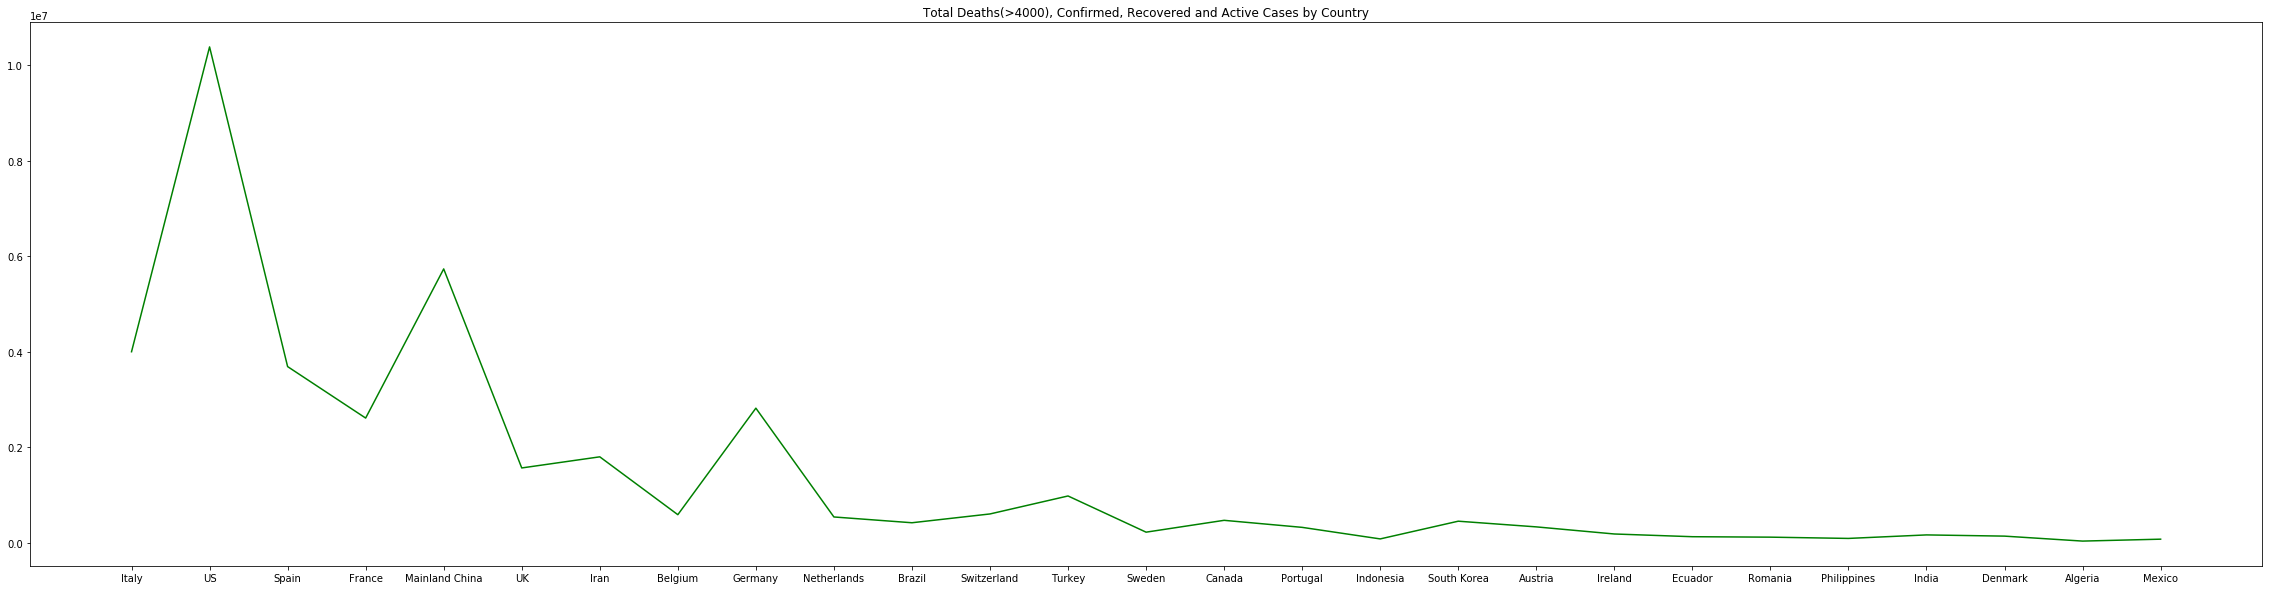

In [33]:
import matplotlib.pyplot as plt
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
 
r_data = covid_data.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
r_data = r_data.sort_values(by='Deaths', ascending=False)
r_data = r_data[r_data['Deaths']>4000]
plt.figure(figsize=(40, 10))
#plt.plot(r_data['Country/Region'], r_data['Deaths'],color='red')
plt.plot(r_data['Country/Region'], r_data['Confirmed'],color='green')
#plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue')
#plt.plot(r_data['Country/Region'], r_data['Active'], color='black')
 
plt.title('Total Deaths(>4000), Confirmed, Recovered and Active Cases by Country')
plt.show()

Plots just the countries that exceeded 1000 cases by 3/14/20

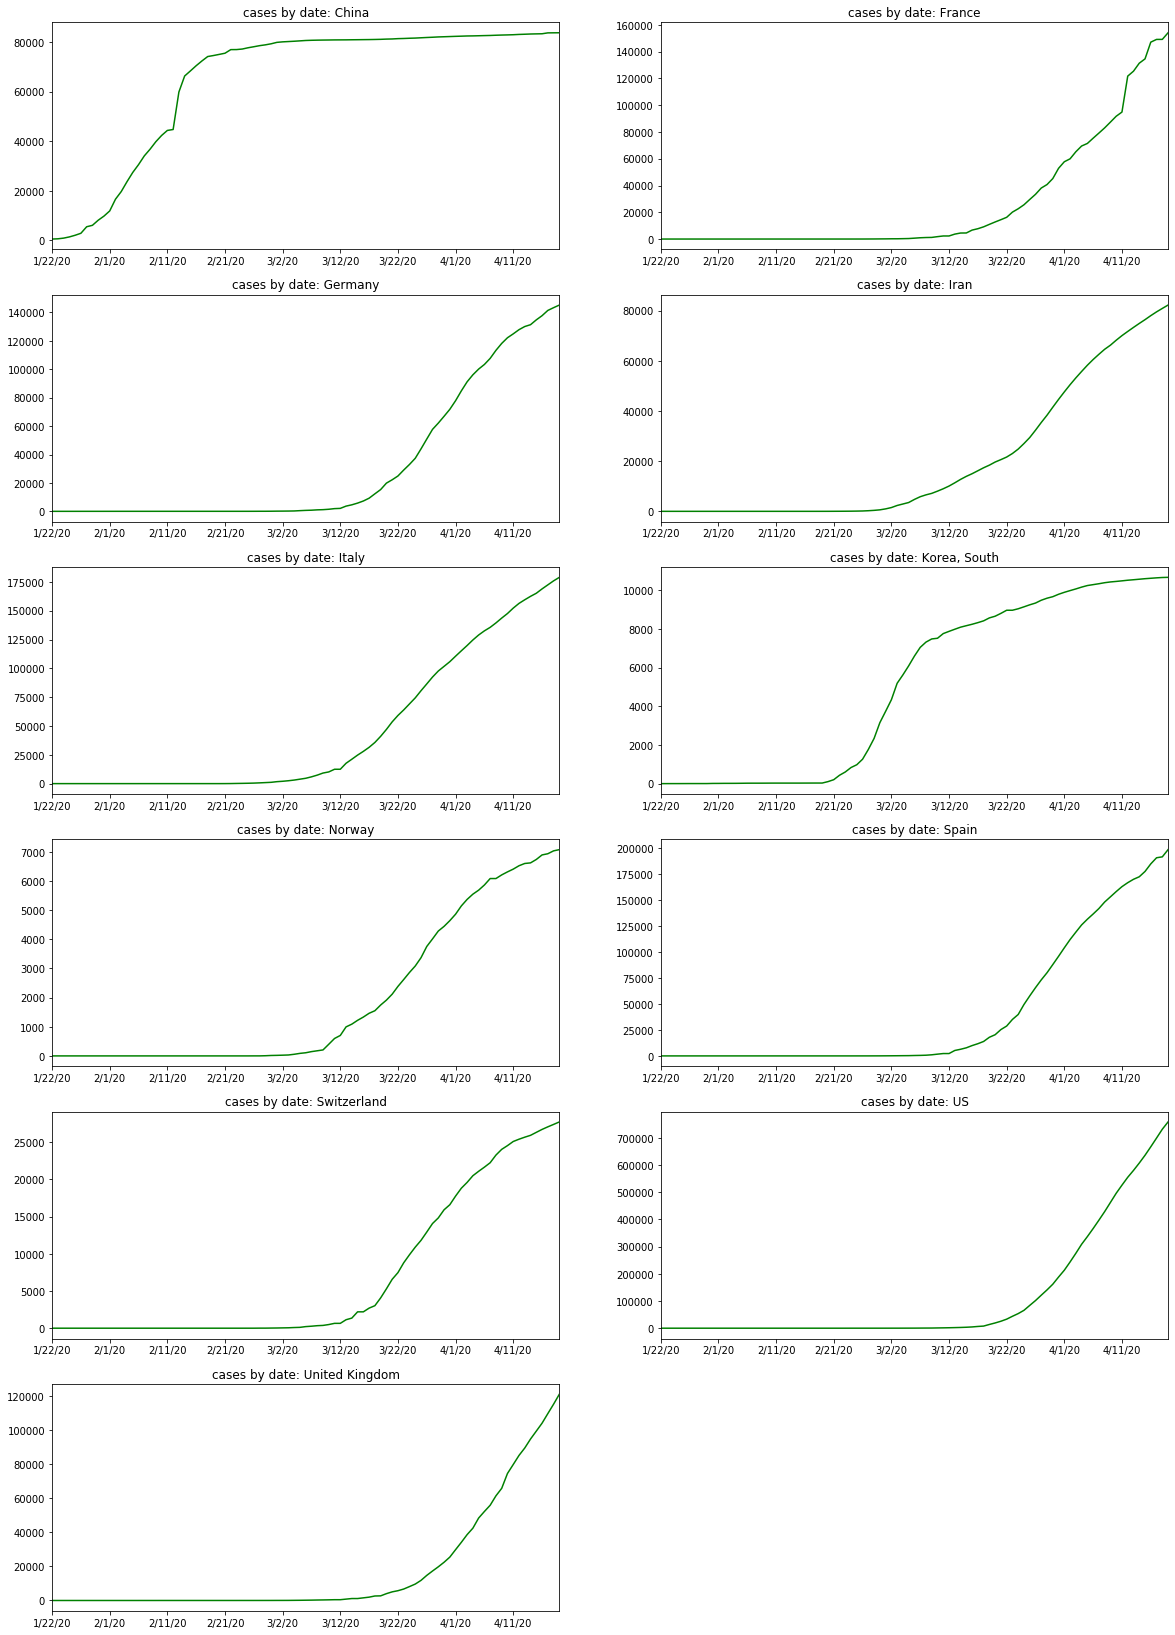

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# open the CSV file
ts_covid19_conformed = 'time_series_covid_19_confirmed.csv'

corona_data = pd.read_csv(ts_covid19_conformed)
countries = sorted(corona_data['Country/Region'].unique())
n_rows = len(countries) // 2 + 1
i = 0
for country in (countries):
    country_data = corona_data[corona_data['Country/Region'] == country]
    # sum all the rows together for each column, and select only the data columns
    by_date = country_data.sum(axis=0).filter(like='/20')
    
    # plot it if numbers exceed specified amount on date
    if by_date['3/14/20'] > 1000:
        plt.subplot(n_rows, 2, i+1)
        by_date.plot(title='cases by date: %s' % country, color='green', figsize=(20,5 * n_rows))
        i += 1

https://medium.com/@lindagcai/plot-a-covid-19-time-series-per-country-e43927dda6fa

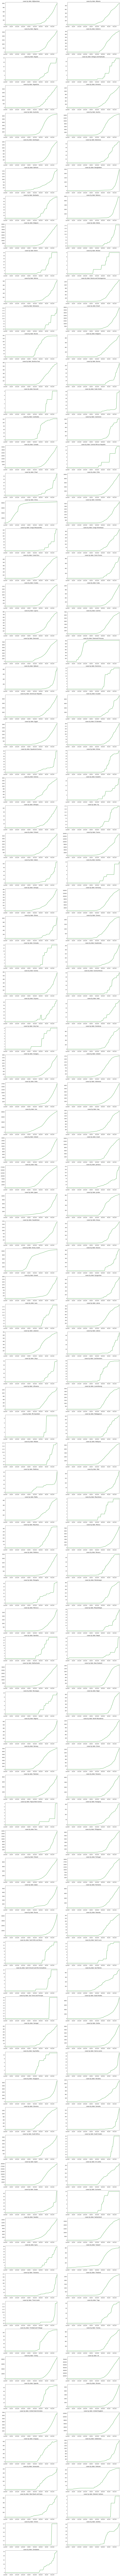

In [29]:
local_url = 'time_series_covid_19_confirmed.csv'
corona_data = pd.read_csv(local_url)
# filter to just your country of choice, or plot all of them
countries = sorted(corona_data['Country/Region'].unique())
n_rows = len(countries) // 2 + 1
for i, country in enumerate(countries):
    country_data = corona_data[corona_data['Country/Region'] == country]
    plt.subplot(n_rows, 2, i+1)
    # sum all the rows together for each column,
    # and select only the date columns (they end in '/20')
    by_date = country_data.sum(axis=0).filter(like='/20')
    # plot it
    by_date.plot(title='cases by date: %s' % country, color='green', figsize=(20,5 * n_rows))